<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

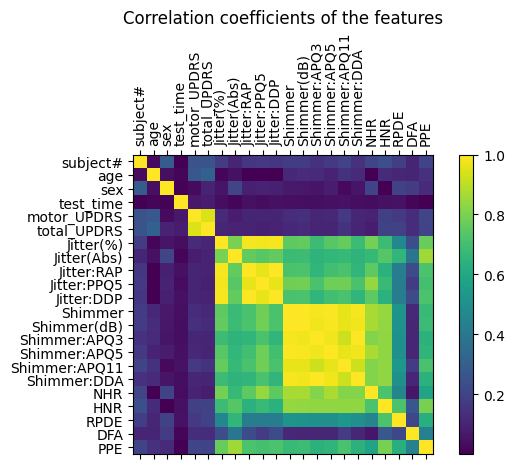

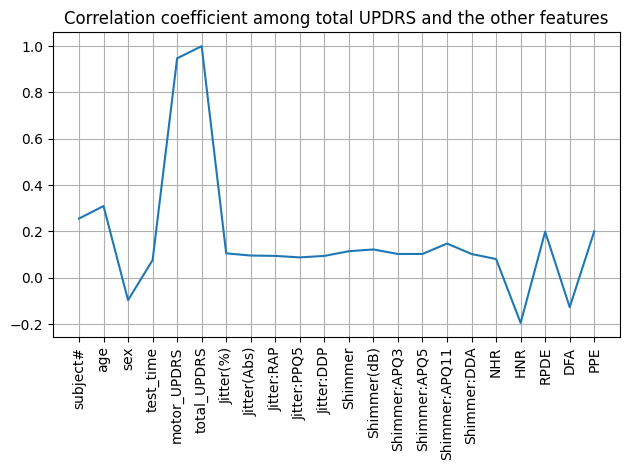

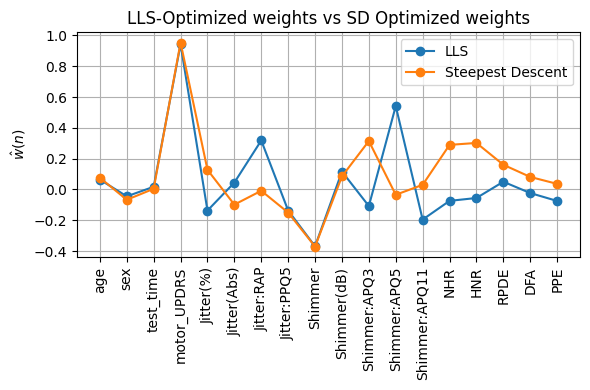

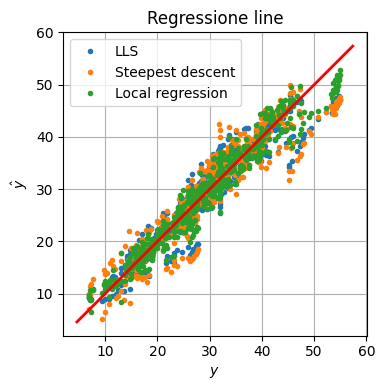

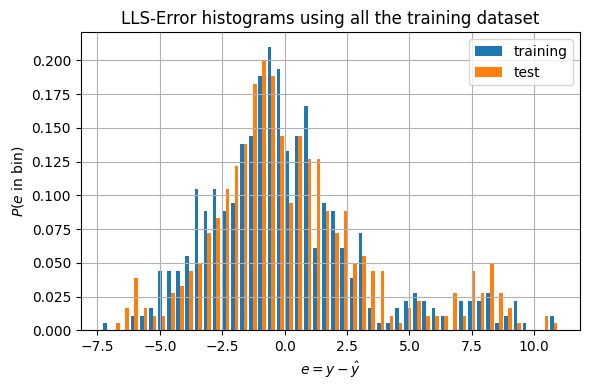

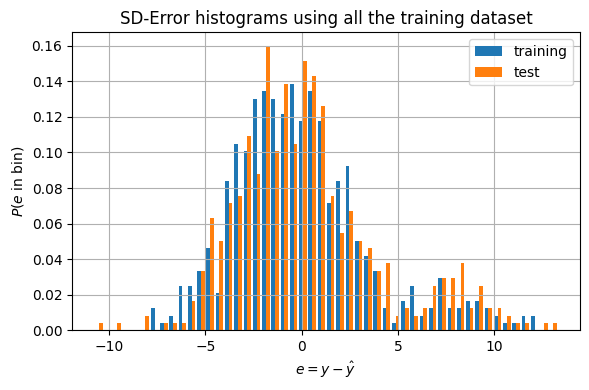

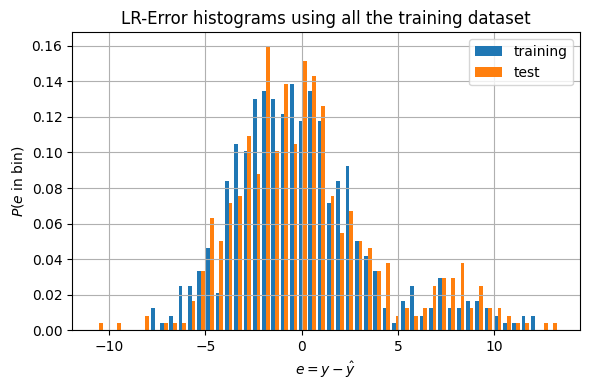

LLS:

               min        max          mean       std        MSE       R^2  \
Training -7.296078  10.964656 -2.110097e-15  3.097916   9.597086  0.915205   
test     -6.696713  10.829705  3.347563e-01  3.305773  11.040200  0.903783   

          corr_coeff  
Training    0.956663  
test        0.951426   


Steepest descent: 

                min        max          mean       std        MSE       R^2  \
Training  -7.697745  12.021265 -1.808654e-15  3.582245  12.832476  0.886618   
test     -10.762716  13.310497  2.893597e-01  3.815246  14.639833  0.872411   

          corr_coeff  
Training    0.942213  
test        0.934474   


Local regression: 

               min       max      mean       std       MSE       R^2  \
Training -5.685303  7.202789  0.005491  2.280227  5.199466  0.954060   
test     -6.415436  7.720551  0.155919  2.476310  6.156420  0.946346   

          corr_coeff  
Training    0.976764  
test        0.972973   




In [1]:
import sub.regression as myreg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = pd.read_csv("C:\Coding\ICT_for_health\LAB01\parkinsons_updrs.csv")

#Analysis of dataframe
x.describe().T
x.info()
subj = pd.unique(x['subject#']) #unique values of patient ID
print("\nThe number of distinct patients in the dataset is ", len(subj))

X = pd.DataFrame()
for k in subj:
    xk = x[x['subject#'] == k]  #data of user k
    xk1 = xk.copy()
    xk1.test_time = xk1.test_time.astype(int)   #remove decimal values to consider just the day and not the hour
    xk1['g'] = xk1['test_time'] # add a new feature g with test_time values
    v = xk1.groupby('g').mean() # group by the g features(test_time) to have averaged values per day 
    X = pd.concat([X,v], axis=0, ignore_index=True) #Concatenate the k-patients by row ignoring index

features = list(x.columns)
print("\nThe dataset shape after the mean is: ", X.shape)
print("\nThe features of the dataset are ", len(features))
print("\n", features)
print("\n\n")
Np, Nc = X.shape

# Measure and show the covariance matrix
Xnorm = (X - X.mean())/X.std() #normalize dataset
c = Xnorm.cov() #measure the covariance
plt.figure()
plt.matshow(np.abs(c.values), fignum = 0)
plt.xticks(np.arange(len(features)), features, rotation = 90)
plt.yticks(np.arange(len(features)), features, rotation = 0)
plt.colorbar()
plt.title("Correlation coefficients of the features")
plt.tight_layout()
plt.savefig("C:\Coding\ICT_for_health\LAB01\charts\corr_coeff_features.png")
#plt.show()

plt.figure()
c.total_UPDRS.plot()
plt.grid()
plt.xticks(np.arange(len(features)), features, rotation = 90)
plt.title("Correlation coefficient among total UPDRS and the other features")
plt.tight_layout()
plt.savefig("C:\Coding\ICT_for_health\LAB01\charts\corr_coeffTotal.png")
#plt.show()

#Shuffle the data
Xsh = X.sample(frac=1, replace=False, random_state=309709, axis=0, ignore_index=True)

# Generate training and test matrices
Ntr = int(Np*0.5)
Nte = Np - Ntr
X_tr = Xsh[0:Ntr]   #dataframe of the training data
mm = X_tr.mean()
ss = X_tr.std()
my = mm['total_UPDRS']  #mean of total_UPDRS
sy = ss['total_UPDRS']  #st. dev. of total UPDRS

# Generate the normalized training and test datasets, remove unwanted regressors
Xsh_norm=(Xsh-mm)/ss  #normalized data
ysh_norm=Xsh_norm['total_UPDRS']  #regressand only
Xsh_norm=Xsh_norm.drop(['total_UPDRS','subject#'],axis=1) #regressors only

#LLS regression
#All the features
""" 
r1 = myreg.regression(Xsh_norm, ysh_norm, Ntr)
r1.plot_LLS_vs_SD()
#r1.steepestDescent()

r1.y_hat_te = denormalize(r1.y_hat_te, sy, my)
r1.y_hat_tr = denormalize(r1.y_hat_tr, sy, my)
r1.y_tr = denormalize(r1.y_tr, sy, my)
r1.y_te = denormalize(r1.y_te, sy, my)

r1.plotHistrogram("LLS-hist_all.png")
r1.plotRegressionLine("y_hat_vs_y-all.png")
r1.errorsAndCoefficients()
 """
#Excluding Jitter:DDP and Shimmer:DDA
Xsh_norm=Xsh_norm.drop(['Jitter:DDP', 'Shimmer:DDA'],axis=1)
r2 = myreg.regression(Xsh_norm, ysh_norm, Ntr, sy, my)
r2.localRegression(100)
r2.LLS()
r2.steepestDescent()
r2.plot_LLS_vs_SD()
r2.denormalize(sy, my)

r2.plotRegressionLine()
r2.plotHistrogram(title="LLS-Error", algorithm="LLS")
r2.plotHistrogram(title="SD-Error", algorithm="SD")
r2.plotHistrogram(title="LR-Error", algorithm="SD")
r2.errorsAndCoefficients(algorithm="LLS")
r2.errorsAndCoefficients(algorithm="SD")
r2.errorsAndCoefficients(algorithm="LR")